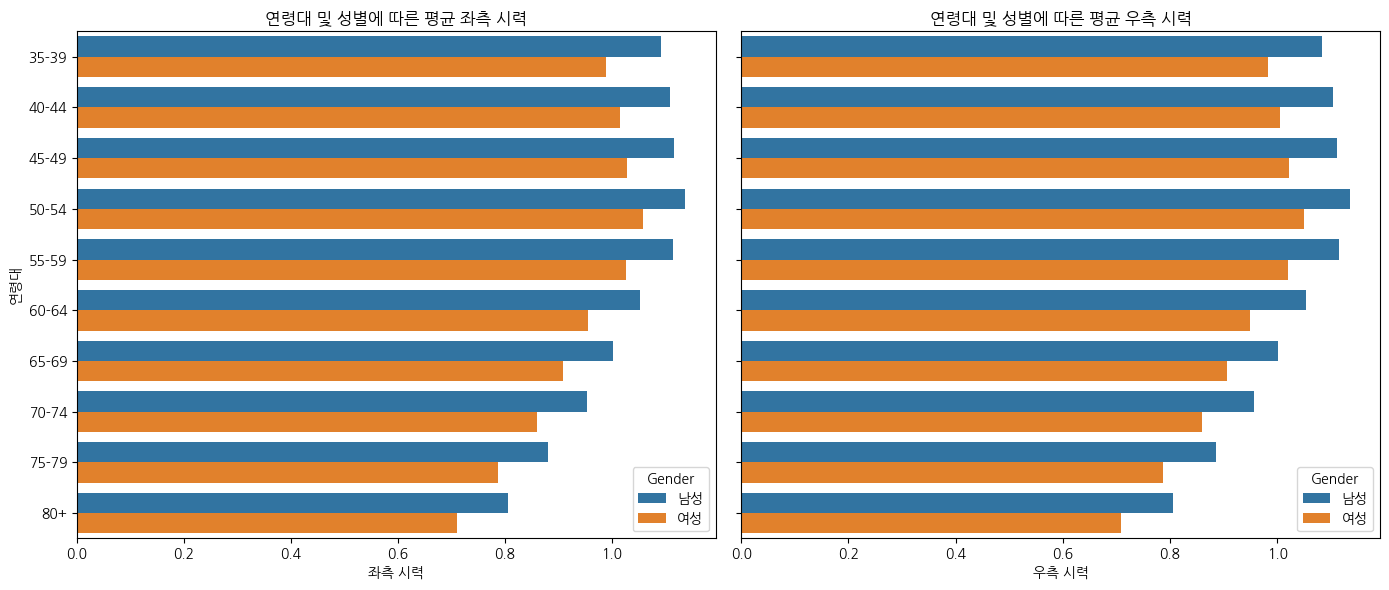

In [1]:
import pandas as pd  # 데이터 분석을 위한 판다스 라이브러리 불러오기
import numpy as np  # 수치 연산을 위한 넘파이 라이브러리 불러오기
import seaborn as sns  # 데이터 시각화를 위한 시본(Seaborn) 라이브러리 불러오기
import matplotlib.pyplot as plt  # 그래프 시각화를 위한 맷플롯립 라이브러리 불러오기
import koreanize_matplotlib  # 한글 폰트 설정을 위한 라이브러리 불러오기

# 데이터 불러오기: 건강보험 데이터를 원격 URL에서 CSV 파일 형태로 불러옴
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

# 필요한 열 선택: 분석에 사용할 열만 선택 ('성별코드', '연령대코드(5세단위)', '시력(좌)', '시력(우)')
df = df[['성별코드', '연령대코드(5세단위)', '시력(좌)', '시력(우)']]

# 컬럼명 영어로 변경: 코드 이해를 쉽게 하기 위해 컬럼명을 영어로 변경
df.columns = ['Gender', 'Age_Group', 'Left_Eye', 'Right_Eye']

# 시력 값이 0.1 이하인 경우 0.1로 설정, 9.9인 경우 실명 데이터로 간주하여 제외 (NaN 처리)
df['Left_Eye'] = df['Left_Eye'].apply(lambda x: max(x, 0.1) if x < 9.9 else np.nan)
df['Right_Eye'] = df['Right_Eye'].apply(lambda x: max(x, 0.1) if x < 9.9 else np.nan)

# 성별 코드 변환: 숫자로 되어 있는 성별 코드를 '남성'과 '여성'으로 변환
df['Gender'] = df['Gender'].replace({1: '남성', 2: '여성'})

# 연령대 코드 변환: 연령대 코드를 5세 단위로 그룹화
def age_group_label(age_code):
    # 예외 처리: 연령대 코드가 정상 범위를 벗어난 경우 NaN으로 설정
    if age_code < 0 or age_code > 14:  
        return np.nan
    # 20-24세
    if age_code == 2:  
        return "20-24"
    # 25-29세
    elif age_code == 3:  
        return "25-29"
    # 30-34세
    elif age_code == 4:  
        return "30-34"
    # 35-39세
    elif age_code == 5:  
        return "35-39"
    # 40-44세
    elif age_code == 6:  
        return "40-44"
    # 45-49세
    elif age_code == 7:  
        return "45-49"
    # 50-54세
    elif age_code == 8:  
        return "50-54"
    # 55-59세
    elif age_code == 9:  
        return "55-59"
    # 60-64세
    elif age_code == 10:  
        return "60-64"
    # 65-69세
    elif age_code == 11:  
        return "65-69"
    # 70-74세
    elif age_code == 12:  
        return "70-74"
    # 75-79세
    elif age_code == 13:  
        return "75-79"
    # 80세 이상
    else:  
        return "80+"

# 연령대 코드 변환 적용: 각 연령대 코드를 5세 단위로 그룹화된 레이블로 변환
df['Age_Group'] = df['Age_Group'].apply(age_group_label)

# 연령대별, 성별로 그룹화하여 좌우 시력의 평균 계산
grouped = df.groupby(['Age_Group', 'Gender']).mean().reset_index()

# 시각화 준비: 1행 2열의 서브플롯을 생성, figsize=(14, 6)은 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 왼쪽 눈 시력 막대 그래프
sns.barplot(ax=axes[0], data=grouped, x='Left_Eye', y='Age_Group', hue='Gender', orient='h', errorbar=None)
# 그래프 제목 설정
axes[0].set_title('연령대 및 성별에 따른 평균 좌측 시력')
# x축 라벨 설정
axes[0].set_xlabel('좌측 시력')
# y축 라벨 설정
axes[0].set_ylabel('연령대')

# 오른쪽 눈 시력 막대 그래프
sns.barplot(ax=axes[1], data=grouped, x='Right_Eye', y='Age_Group', hue='Gender', orient='h', errorbar=None)
# 그래프 제목 설정
axes[1].set_title('연령대 및 성별에 따른 평균 우측 시력')
# x축 라벨 설정
axes[1].set_xlabel('우측 시력')
# y축 라벨 설정 (좌우 그래프의 y축을 동일하게 유지)
axes[1].set_ylabel('연령대')

# 두 그래프 간격 조절: 그래프 사이의 간격을 설정 (wspace=0.6)
plt.subplots_adjust(wspace=0.6)

# 레이아웃 자동 조정
plt.tight_layout()
# 그래프 출력
plt.show()
